In [2]:
from d2c.data_generation.builder import Builder
import math

In [3]:
builder = Builder(
    observations=250,  # number of observations per dataset
    n_variables_exo=2,  # number of exogenous variables
    n_variables_endo=4,  # number of endogenous variables
    functions_to_use=[
            "linear",
            "polynomial",
            "sigmoid",
            "nonlinear",
            "interaction",
        ],  # functions to generate the data
    functions_kwargs={
        "polynomial": [[1, 2], [2, 3]],  # arguments for the functions
        'nonlinear': [math.sin, math.tanh],
    },  # arguments for the functions
    datasets_per_function=1000,  # number of datasets per function
    noise_std=0.2,  # standard deviation of noise
    seed=42  # seed for reproducibility
)

# Step 2: Generate the datasets and DAGs
builder.build()


In [6]:
# we can check one of the generated dataset
builder.get_generated_observations()['linear'][0]

,X0,X1,X2,X3,U0,U1
0,1.393252,3.691058,1.748650,3.555392,0.347475,0.920161
1,-0.110542,0.682285,0.030283,-0.142681,0.718562,0.071839
2,0.068731,0.760519,0.252685,0.214289,0.364266,0.064543
3,0.154323,1.301137,0.251702,0.499176,0.662614,0.019691
4,0.618971,2.102485,0.757882,1.466287,0.787744,0.634516
...,...,...,...,...,...,...
245,0.024906,0.968567,-0.022994,0.204036,0.755898,0.091661
246,0.098280,0.757843,0.127405,0.152927,0.565149,0.172209
247,0.455472,2.510461,0.642125,1.234296,0.951255,0.417952
248,0.171597,1.169923,0.374956,0.526025,0.682310,0.014079


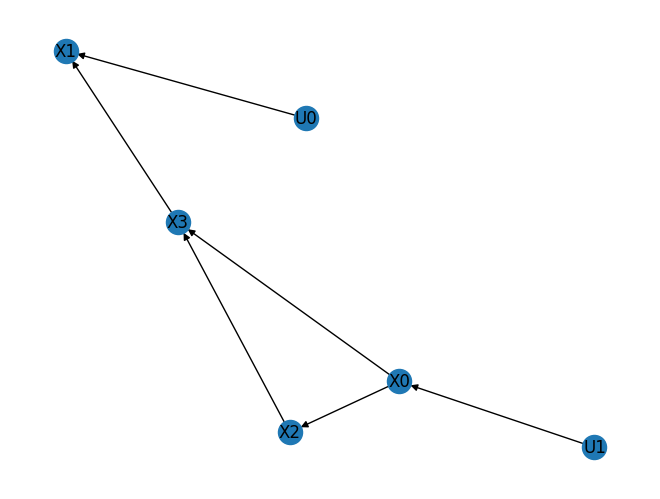

In [7]:
# we can check one of the generated dags
import networkx as nx
dag = builder.get_generated_dags()['linear'][0]
nx.draw(dag, with_labels=True)

In [4]:
builder.to_pickle('example/synthetic_data.pkl')